In [1]:
# Sourcing and Importing 

In [2]:
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import warnings # For handling error messages 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd") 

In [3]:
df_2015 = pd.read_csv('2015dogdata.csv')
df_2015.head() 

,Owner_ID,Age,Gender,City District,City Quarter,Primary Breed,Primary Hybrid,Secondary Breed,Secondary Hybrid,Breed Type,Dog Birth Year,Dog Gender,Dog Hair Color
0,126,51-60,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,574,61-70,w,2.0,23.0,Cairn Terrier,NaN,NaN,NaN,K,2002,w,brindle
2,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
3,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz
4,1177,51-60,m,10.0,102.0,Shih Tzu,NaN,NaN,NaN,K,2011,m,schwarz/weiss


In [4]:
df_2016 = pd.read_csv('2016dogdata.csv') 
df_2016.head() 

,Owner_ID,Age,Gender,City District,City Quarter,Primary Breed,Primary Hybrid,Secondary Breed,Secondary Hybrid,Breed Type,Dog Birth Year,Dog Gender,Dog Hair Color
0,126,51-60,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,171,61-70,m,3.0,31.0,Berner Sennenhund,NaN,NaN,NaN,I,2009,m,tricolor
2,574,61-70,w,2.0,23.0,Cairn Terrier,NaN,NaN,NaN,K,2002,w,brindle
3,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
4,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz


In [5]:
df_2017 = pd.read_csv('2017dogdata.csv') 
df_2017.head() 

,Owner_ID,Age,Gender,City District,City Quarter,Primary Breed,Primary Hybrid,Secondary Breed,Secondary Hybrid,Breed Type,Dog Birth Year,Dog Gender,Dog Hair Color
0,126,61-70,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,171,61-70,m,3.0,31.0,Berner Sennenhund,NaN,NaN,NaN,I,2009,m,tricolor
2,574,61-70,w,2.0,23.0,Mischling gross,NaN,NaN,NaN,I,2013,w,schwarz
3,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
4,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz


In [6]:
# Cleaning and Transforming

In [7]:
# Remove unneeded features 
df_2015 = df_2015[['Age', 'Gender', 'City District', 'City Quarter', 'Breed Type', 'Dog Gender', 'Dog Hair Color']]
df_2016 = df_2016[['Age', 'Gender', 'City District', 'City Quarter', 'Breed Type', 'Dog Gender', 'Dog Hair Color']]
df_2017 = df_2017[['Age', 'Gender', 'City District', 'City Quarter', 'Breed Type', 'Dog Gender', 'Dog Hair Color']]  
df_2015.head() 

,Age,Gender,City District,City Quarter,Breed Type,Dog Gender,Dog Hair Color
0,51-60,m,9.0,92.0,K,w,schwarz/braun
1,61-70,w,2.0,23.0,K,w,brindle
2,41-50,m,6.0,63.0,I,w,braun
3,61-70,w,7.0,71.0,I,w,schwarz
4,51-60,m,10.0,102.0,K,m,schwarz/weiss


In [8]:
df_2016.head() 

,Age,Gender,City District,City Quarter,Breed Type,Dog Gender,Dog Hair Color
0,51-60,m,9.0,92.0,K,w,schwarz/braun
1,61-70,m,3.0,31.0,I,m,tricolor
2,61-70,w,2.0,23.0,K,w,brindle
3,41-50,m,6.0,63.0,I,w,braun
4,61-70,w,7.0,71.0,I,w,schwarz


In [9]:
df_2017.head() 

,Age,Gender,City District,City Quarter,Breed Type,Dog Gender,Dog Hair Color
0,61-70,m,9.0,92.0,K,w,schwarz/braun
1,61-70,m,3.0,31.0,I,m,tricolor
2,61-70,w,2.0,23.0,I,w,schwarz
3,41-50,m,6.0,63.0,I,w,braun
4,61-70,w,7.0,71.0,I,w,schwarz


In [10]:
# Remove any NAN 

In [11]:
df_2015 = df_2015.dropna() 
df_2016 = df_2016.dropna() 
df_2017 = df_2017.dropna() 

In [12]:
df_2015.dtypes

Age                object
Gender             object
City District     float64
City Quarter      float64
Breed Type         object
Dog Gender         object
Dog Hair Color     object
dtype: object

In [13]:
df_2016.dtypes

Age                object
Gender             object
City District     float64
City Quarter      float64
Breed Type         object
Dog Gender         object
Dog Hair Color     object
dtype: object

In [14]:
df_2017.dtypes

Age                object
Gender             object
City District     float64
City Quarter      float64
Breed Type         object
Dog Gender         object
Dog Hair Color     object
dtype: object

In [15]:
# Visualize the data 

Text(0.5, 1.0, 'Dogs per City District 2015')

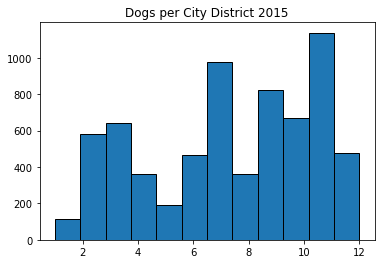

In [16]:
# visualize dogs per city district
district_2015 = df_2015['City District'] 
district_2016 = df_2016['City District'] 
district_2017 = df_2017['City District'] 
plt.hist(district_2015, bins=12, edgecolor='black') 
plt.title('Dogs per City District 2015') 

Text(0.5, 1.0, 'Dogs per City District 2016')

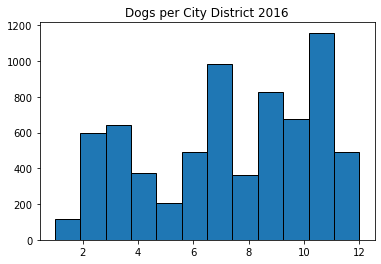

In [17]:
plt.hist(district_2016, bins=12, edgecolor='black') 
plt.title('Dogs per City District 2016') 

Text(0.5, 1.0, 'Dogs per City District 2017')

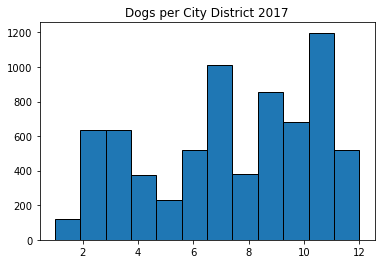

In [18]:
plt.hist(district_2017, bins=12, edgecolor='black') 
plt.title('Dogs per City District 2017') 

Text(0.5, 1.0, 'Dogs per City Quarter 2015')

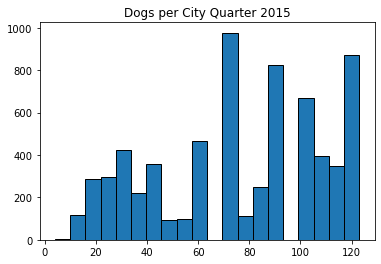

In [19]:
#  visualize dogs per city quarter 
quarter_2015 = df_2015['City Quarter'] 
quarter_2016 = df_2016['City Quarter'] 
quarter_2017 = df_2017['City Quarter'] 
plt.hist(quarter_2015, bins=20, edgecolor='black') 
plt.title('Dogs per City Quarter 2015') 

Text(0.5, 1.0, 'Dogs per City Quarter 2016')

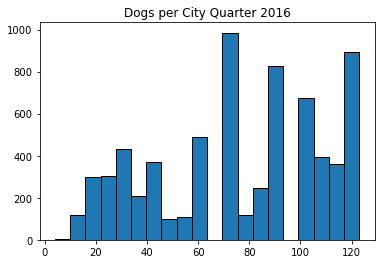

In [20]:
plt.hist(quarter_2016, bins=20, edgecolor='black') 
plt.title('Dogs per City Quarter 2016') 

Text(0.5, 1.0, 'Dogs per City Quarter 2017')

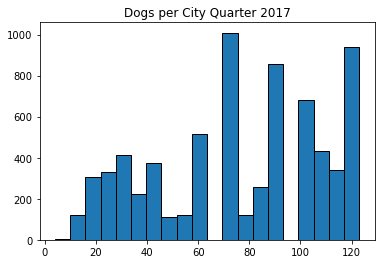

In [21]:
plt.hist(quarter_2017, bins=20, edgecolor='black') 
plt.title('Dogs per City Quarter 2017') 

In [22]:
# visualize dog owner genders by age groups 
label = ['20-Nov', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90','91-100']
x = np.arange(len(label))
width = 0.35 

df_2015.Age.unique() 

array(['51-60', '61-70', '41-50', '71-80', '31-40', '81-90', '21-30',
       '91-100', '20-Nov'], dtype=object)

In [24]:
men_2015, women_2015 = [], [] 
for age in label:
    men_2015.append(len(df_2015[(df_2015.Gender == 'm') & (df_2015.Age == age)]))
    women_2015.append(len(df_2015[(df_2015.Gender == 'w') & (df_2015.Age == age)]))
    
print(men_2015)
print(women_2015) 

[9, 177, 393, 491, 471, 339, 217, 55, 3]
[31, 596, 847, 965, 1017, 668, 409, 105, 10]


In [25]:
men_2016, women_2016 = [], [] 
for age in label:
    men_2016.append(len(df_2016[(df_2016.Gender == 'm') & (df_2016.Age == age)]))
    women_2016.append(len(df_2016[(df_2016.Gender == 'w') & (df_2016.Age == age)]))
    
print(men_2016)
print(women_2016) 

[8, 174, 403, 507, 456, 340, 216, 53, 4]
[33, 588, 890, 985, 1044, 670, 424, 120, 12]


In [26]:
men_2017, women_2017 = [], [] 
for age in label:
    men_2017.append(len(df_2017[(df_2017.Gender == 'm') & (df_2017.Age == age)]))
    women_2017.append(len(df_2017[(df_2017.Gender == 'w') & (df_2017.Age == age)]))
    
print(men_2017)
print(women_2017) 

[9, 181, 434, 495, 456, 342, 219, 56, 4]
[36, 608, 949, 994, 1091, 699, 454, 116, 11]


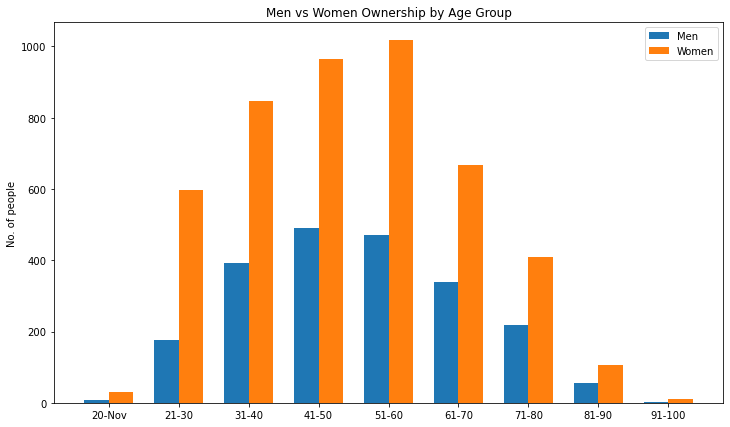

In [27]:
fig,ax = plt.subplots(figsize=(12,7))
rec = ax.bar(x-width/2, men_2015, width, label='Men')
rect = ax.bar(x+width/2, women_2015, width, label='Women')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.set_ylabel('No. of people')
ax.set_title('Men vs Women Ownership by Age Group 2015')
ax.legend() 

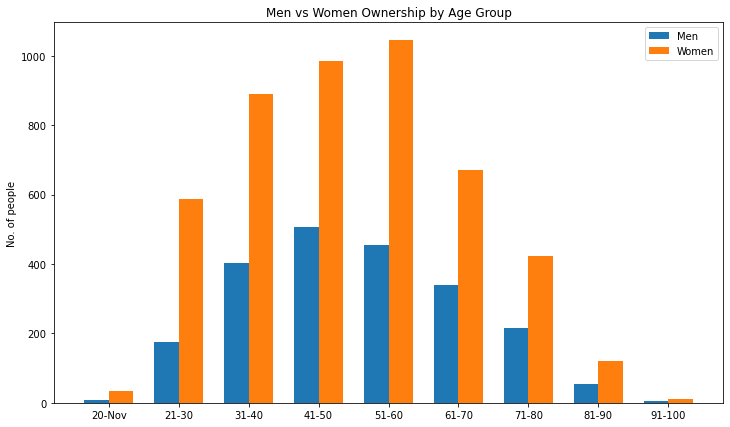

In [28]:
fig,ax = plt.subplots(figsize=(12,7))
rec = ax.bar(x-width/2, men_2016, width, label='Men')
rect = ax.bar(x+width/2, women_2016, width, label='Women')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.set_ylabel('No. of people')
ax.set_title('Men vs Women Ownership by Age Group 2016')
ax.legend()

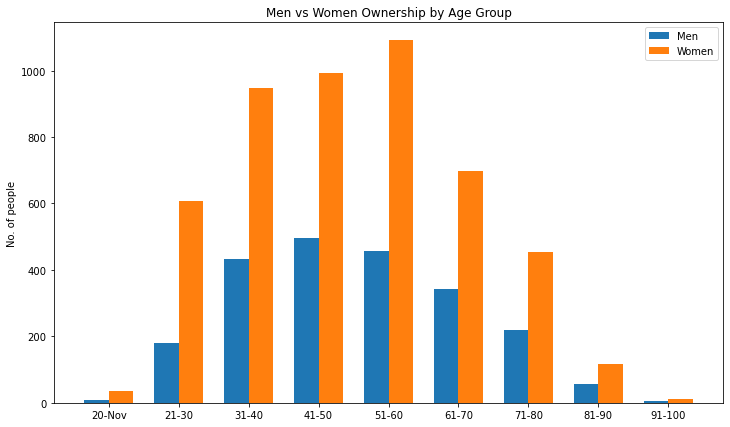

In [29]:
fig,ax = plt.subplots(figsize=(12,7))
rec = ax.bar(x-width/2, men_2017, width, label='Men')
rect = ax.bar(x+width/2, women_2017, width, label='Women')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.set_ylabel('No. of people')
ax.set_title('Men vs Women Ownership by Age Group 2017')
ax.legend()

In [31]:
df_2015['Breed Type'].unique() 

array(['K', 'I', 'II'], dtype=object)

In [32]:
t1_2015, t2_2015, t3_2015 = [], [], []
for age in label:
    t1_2015.append(len(df_2015[(df_2015['Breed Type'] == 'K') & (df_2015.Age == age)]))
    t2_2015.append(len(df_2015[(df_2015['Breed Type'] == 'I') & (df_2015.Age == age)]))
    t3_2015.append(len(df_2015[(df_2015['Breed Type'] == 'II') & (df_2015.Age == age)]))
print(t1_2015)
print(t2_2015)
print(t3_2015) 

[32, 538, 733, 886, 870, 637, 386, 112, 9]
[8, 232, 499, 564, 612, 369, 239, 48, 4]
[0, 3, 8, 6, 6, 1, 1, 0, 0]


In [34]:
t1_2016, t2_2016, t3_2016 = [], [], []
for age in label:
    t1_2016.append(len(df_2016[(df_2016['Breed Type'] == 'K') & (df_2016.Age == age)]))
    t2_2016.append(len(df_2016[(df_2016['Breed Type'] == 'I') & (df_2016.Age == age)]))
    t3_2016.append(len(df_2016[(df_2016['Breed Type'] == 'II') & (df_2016.Age == age)]))
print(t1_2016)
print(t2_2016)
print(t3_2016) 

[33, 518, 783, 938, 871, 659, 407, 128, 11]
[8, 243, 504, 548, 623, 351, 232, 45, 5]
[0, 1, 6, 6, 6, 0, 1, 0, 0]


In [35]:
t1_2017, t2_2017, t3_2017 = [], [], []
for age in label:
    t1_2017.append(len(df_2017[(df_2017['Breed Type'] == 'K') & (df_2017.Age == age)]))
    t2_2017.append(len(df_2017[(df_2017['Breed Type'] == 'I') & (df_2017.Age == age)]))
    t3_2017.append(len(df_2017[(df_2017['Breed Type'] == 'II') & (df_2017.Age == age)]))
print(t1_2017)
print(t2_2017)
print(t3_2017) 

[31, 532, 833, 943, 925, 670, 434, 126, 10]
[14, 255, 547, 540, 618, 369, 238, 46, 5]
[0, 2, 3, 6, 4, 2, 1, 0, 0]


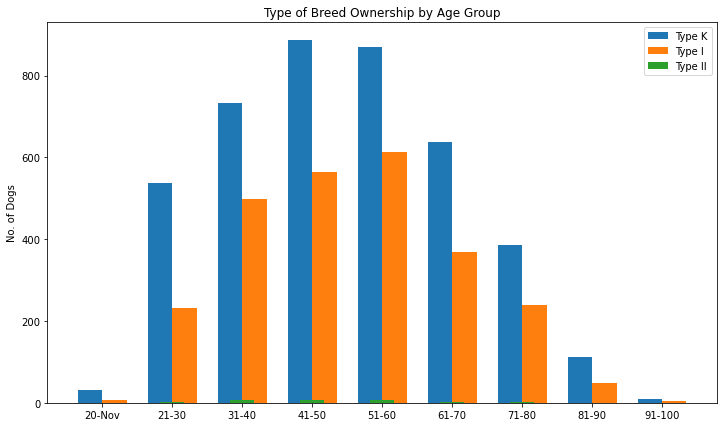

In [36]:
fig1,ax1 = plt.subplots(figsize=(12,7))
rec = ax1.bar(x-width/2, t1_2015, width, label='Type K')
rect = ax1.bar(x+width/2, t2_2015, width, label='Type I')
rects = ax1.bar(x, t3_2015, width, label='Type II')
ax1.set_xticks(x)
ax1.set_xticklabels(label)
ax1.set_ylabel('No. of Dogs')
ax1.set_title('Type of Breed Ownership by Age Group 2015')
ax1.legend() 

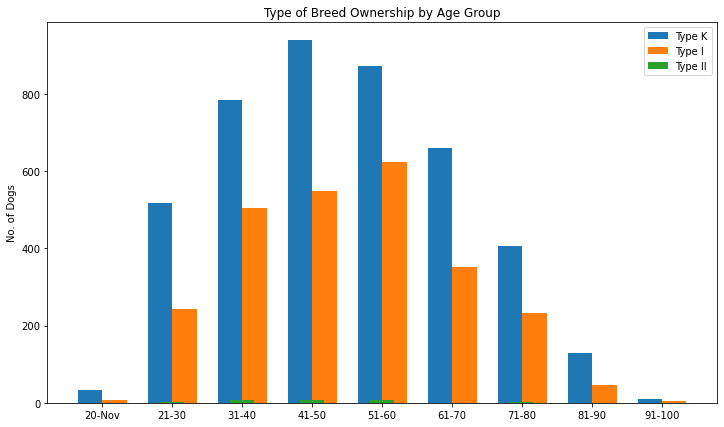

In [37]:
fig1,ax1 = plt.subplots(figsize=(12,7))
rec = ax1.bar(x-width/2, t1_2016, width, label='Type K')
rect = ax1.bar(x+width/2, t2_2016, width, label='Type I')
rects = ax1.bar(x, t3_2016, width, label='Type II')
ax1.set_xticks(x)
ax1.set_xticklabels(label)
ax1.set_ylabel('No. of Dogs')
ax1.set_title('Type of Breed Ownership by Age Group 2016')
ax1.legend()

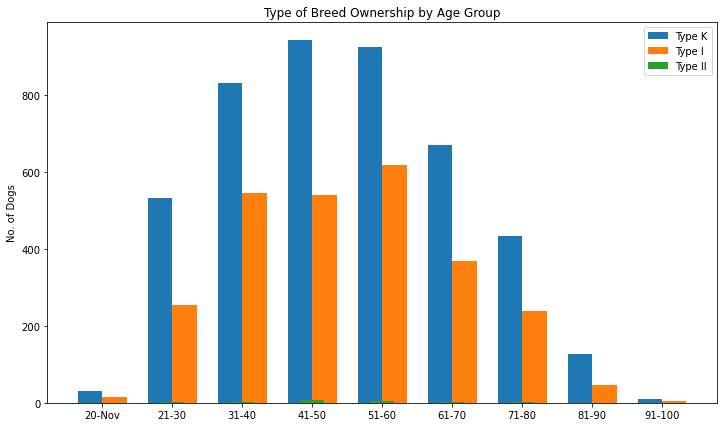

In [38]:
fig1,ax1 = plt.subplots(figsize=(12,7))
rec = ax1.bar(x-width/2, t1_2017, width, label='Type K')
rect = ax1.bar(x+width/2, t2_2017, width, label='Type I')
rects = ax1.bar(x, t3_2017, width, label='Type II')
ax1.set_xticks(x)
ax1.set_xticklabels(label)
ax1.set_ylabel('No. of Dogs')
ax1.set_title('Type of Breed Ownership by Age Group 2017')
ax1.legend()

In [40]:
type_k_2015 = df_2015[df_2015['Breed Type'] == 'II']
type_k_2015['Dog Hair Color'].unique() 

array(['mahagoni/weiss', 'schwarz', 'beige/weiss', 'gestromt',
       'dunkel gestromt', 'weiss/braun', 'gold/weiss', 'braun/weiss',
       'braun/schwarz', 'schwarz gestromt', 'braun/schwarz/weiss',
       'braun', 'wildfarbig', 'weiss'], dtype=object)

In [41]:
type_k_2016 = df_2016[df_2016['Breed Type'] == 'II']
type_k_2016['Dog Hair Color'].unique() 

array(['mahagoni/weiss', 'gestromt', 'schwarz', 'dunkel gestromt',
       'beige/weiss', 'weiss/braun', 'braun/schwarz', 'schwarz gestromt',
       'braun/schwarz/weiss', 'braun', 'braun/weiss', 'wildfarbig',
       'weiss'], dtype=object)

In [42]:
type_k_2017 = df_2017[df_2017['Breed Type'] == 'II']
type_k_2017['Dog Hair Color'].unique()

array(['mahagoni/weiss', 'gestromt', 'schwarz', 'beige/weiss',
       'braun/schwarz', 'schwarz gestromt', 'braun/schwarz/weiss',
       'braun', 'braun/weiss', 'wildfarbig', 'weiss', 'beige/braun'],
      dtype=object)

In [43]:
colors = ['schwarz', 'blue', 'braun', 'wildfarbig', 'weiss', 'orange']
y = np.arange(len(colors))

In [45]:
d1_2015, d2_2015, d3_2015 = [], [], []
for c in colors:
    d1_2015.append(len(df_2015[(df_2015['Breed Type'] == 'K') & (df_2015['Dog Hair Color'] == c)]))
    d2_2015.append(len(df_2015[(df_2015['Breed Type'] == 'I') & (df_2015['Dog Hair Color'] == c)]))
    d3_2015.append(len(df_2015[(df_2015['Breed Type'] == 'II') & (df_2015['Dog Hair Color'] == c)]))
    
print(d1_2015,d2_2015,d3_2015) 

[336, 4, 307, 5, 442, 17] [382, 2, 210, 4, 84, 3] [5, 0, 3, 1, 1, 0]


In [46]:
d1_2016, d2_2016, d3_2016 = [], [], []
for c in colors:
    d1_2016.append(len(df_2016[(df_2016['Breed Type'] == 'K') & (df_2016['Dog Hair Color'] == c)]))
    d2_2016.append(len(df_2016[(df_2016['Breed Type'] == 'I') & (df_2016['Dog Hair Color'] == c)]))
    d3_2016.append(len(df_2016[(df_2016['Breed Type'] == 'II') & (df_2016['Dog Hair Color'] == c)]))
    
print(d1_2016,d2_2016,d3_2016) 

[355, 4, 306, 7, 454, 18] [387, 2, 210, 3, 81, 3] [4, 0, 2, 1, 1, 0]


In [47]:
d1_2017, d2_2017, d3_2017 = [], [], []
for c in colors:
    d1_2017.append(len(df_2017[(df_2017['Breed Type'] == 'K') & (df_2017['Dog Hair Color'] == c)]))
    d2_2017.append(len(df_2017[(df_2017['Breed Type'] == 'I') & (df_2017['Dog Hair Color'] == c)]))
    d3_2017.append(len(df_2017[(df_2017['Breed Type'] == 'II') & (df_2017['Dog Hair Color'] == c)]))
    
print(d1_2017,d2_2017,d3_2017)

[367, 4, 318, 5, 488, 27] [405, 2, 216, 4, 92, 4] [4, 0, 2, 1, 1, 0]


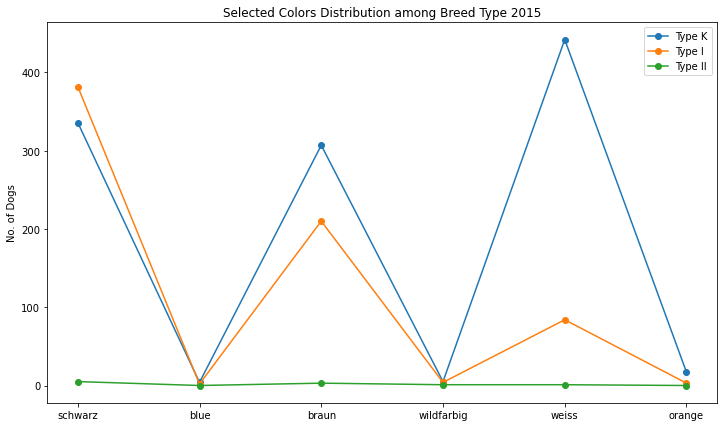

In [48]:
fig2, ax2 = plt.subplots(figsize=(12,7))
type_one = ax2.plot(y, d1_2015, '-o', label='Type K')
type_two = ax2.plot(y, d2_2015, '-o', label='Type I')
type_three = ax2.plot(y, d3_2015, '-o', label='Type II')
ax2.set_xticks(y)
ax2.set_xticklabels(colors)
ax2.set_ylabel('No. of Dogs')
ax2.set_title('Selected Colors Distribution among Breed Type 2015')
ax2.legend()

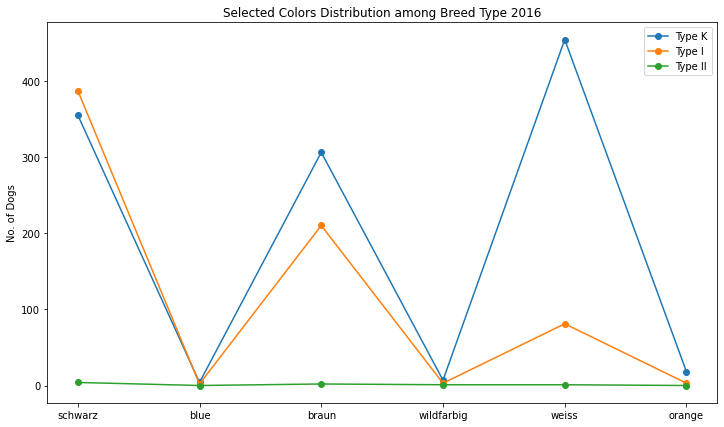

In [49]:
fig2, ax2 = plt.subplots(figsize=(12,7))
type_one = ax2.plot(y, d1_2016, '-o', label='Type K')
type_two = ax2.plot(y, d2_2016, '-o', label='Type I')
type_three = ax2.plot(y, d3_2016, '-o', label='Type II')
ax2.set_xticks(y)
ax2.set_xticklabels(colors)
ax2.set_ylabel('No. of Dogs')
ax2.set_title('Selected Colors Distribution among Breed Type 2016')
ax2.legend()

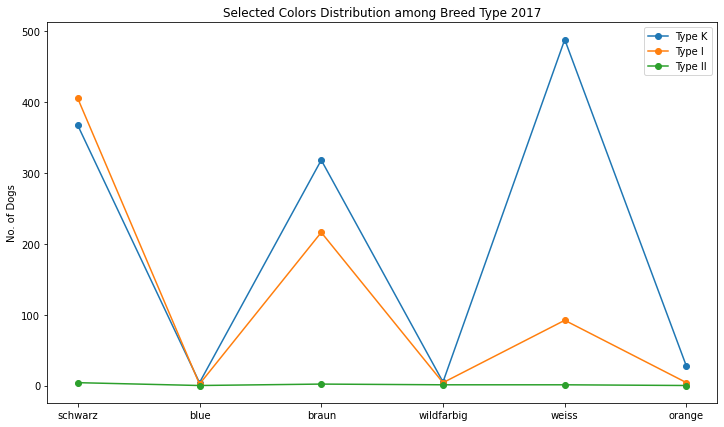

In [50]:
fig2, ax2 = plt.subplots(figsize=(12,7))
type_one = ax2.plot(y, d1_2017, '-o', label='Type K')
type_two = ax2.plot(y, d2_2017, '-o', label='Type I')
type_three = ax2.plot(y, d3_2017, '-o', label='Type II')
ax2.set_xticks(y)
ax2.set_xticklabels(colors)
ax2.set_ylabel('No. of Dogs')
ax2.set_title('Selected Colors Distribution among Breed Type 2017')
ax2.legend() 